# Solar Radiation Prediction

## Dataset Description

This Solar Radiation Prediction dataset is a four-month dataset collected at the HI-SEAS weather station (Hawaii). 
- The dataset contains columns such as: "wind direction", "wind speed", "humidity" and temperature. 
- The response parameter that is to be predicted is: "Solar_radiation". 

The dataset have following attributes:
- The UNIX time_t date (seconds since Jan 1, 1970). Useful in sorting this export's results with other export's results
- The data in yyyy-mm-dd format
- The local time of day in hh:mm:ss 24-hour format
- Solar radiation: watts per meter^2 (W/m2)
- Temperature: (°F)
- Barometric pressure: (Hg)
- Humidity: (%)
- Wind direction: (°)
- Wind speed: (mph)
- Sunrise/sunset: Hawaii time

**Dataset name and URL:**
Solar Radiation Prediction
https://www.kaggle.com/dronio/SolarEnergy

**Research Questions:**
- Which month has the highest intensity of solar radiation
- Which is the major factor affecting increase of solar radiation
- What are the dependencies between:
   - Humidity & Solar radiation
   - Temeperature & Solar radiation

# Importing Libararies

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings; warnings.filterwarnings('ignore')

# Load Dataset

In [41]:
solar = pd.read_csv('SolarPrediction.csv')

# EXploratory Data Analysis (EDA)

In [42]:
solar.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,6:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,6:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,6:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,6:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,6:13:00,18:13:00


In [43]:
solar.shape

(32686, 11)

In [44]:
list(solar)

['UNIXTime',
 'Data',
 'Time',
 'Radiation',
 'Temperature',
 'Pressure',
 'Humidity',
 'WindDirection(Degrees)',
 'Speed',
 'TimeSunRise',
 'TimeSunSet']

In [45]:
#Checking if there are missing values
solar.isnull().sum()
#solar.isnull().any()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

this indicates that there are no missing values.

In [46]:
solar.nunique()

UNIXTime                  32686
Data                        118
Time                       8299
Radiation                 14434
Temperature                  38
Pressure                     38
Humidity                     94
WindDirection(Degrees)    17951
Speed                        37
TimeSunRise                  51
TimeSunSet                   56
dtype: int64

In [47]:
solar.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UNIXTime,32686.0,1.478047e+09,3.005037e+06,1.472724e+09,1.475546e+09,1.478026e+09,1.480480e+09,1.483265e+09
Radiation,32686.0,2.071247e+02,3.159164e+02,1.110000e+00,1.230000e+00,2.660000e+00,3.542350e+02,1.601260e+03
Temperature,32686.0,5.110326e+01,6.201157e+00,3.400000e+01,4.600000e+01,5.000000e+01,5.500000e+01,7.100000e+01
Pressure,32686.0,3.042288e+01,5.467316e-02,3.019000e+01,3.040000e+01,3.043000e+01,3.046000e+01,3.056000e+01
Humidity,32686.0,7.501631e+01,2.599022e+01,8.000000e+00,5.600000e+01,8.500000e+01,9.700000e+01,1.030000e+02
WindDirection(Degrees),32686.0,1.434898e+02,8.316750e+01,9.000000e-02,8.222750e+01,1.477000e+02,1.793100e+02,3.599500e+02
Speed,32686.0,6.243869e+00,3.490474e+00,0.000000e+00,3.370000e+00,5.620000e+00,7.870000e+00,4.050000e+01


The ranges here identified look reasonable. In particular:

- The Solar radiation assumes only positive values, and has a maximum value of 1600 W/m^2 (this is reasonable as the average solar radiation is estimated to be of around 1361 W/m^2);
- The temperature ranges from 30.4 F to 71 F (This corresponds in a range between -1 C to 21 C);
- The pressure variates very little, and in any case has a value of around 1 bar;
- The Humidity has values over 100 %, but only very slightly. This can be considered acceptable for the scope of this work;
- Wind direction is correctly in the range from 0 to 360 degrees. Notice that the direction 0 degrees and 360 degrees are the same measurement, hence some data transformation could be required to correctly account for this phenomena;
- Wind speed is always positive, and its maximum value (40.5 miles/hour or 18 m/s) is reasonable as it corresponds to a grade 8 of the Beaufort scale.

In [48]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


# Data Preprocessing

In [49]:
from datetime import datetime
import datetime as dt
from dateutil.tz import *

In [50]:
#Converting UNIX time to datetime object
solar['Date']= pd.to_datetime(solar['UNIXTime'],unit='s')

#Setting the right timezone to the datetime object
solar['Date'] = solar['Date'].dt.tz_localize('UTC').dt.tz_convert('HST')

In [51]:
solar.dtypes

UNIXTime                                int64
Data                                   object
Time                                   object
Radiation                             float64
Temperature                             int64
Pressure                              float64
Humidity                                int64
WindDirection(Degrees)                float64
Speed                                 float64
TimeSunRise                            object
TimeSunSet                             object
Date                      datetime64[ns, HST]
dtype: object

In [52]:
solar.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Date
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,6:13:00,18:13:00,2016-09-29 23:55:26-10:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,6:13:00,18:13:00,2016-09-29 23:50:23-10:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,6:13:00,18:13:00,2016-09-29 23:45:26-10:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,6:13:00,18:13:00,2016-09-29 23:40:21-10:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,6:13:00,18:13:00,2016-09-29 23:35:24-10:00


In [53]:
solar['month'] = solar['Date'].dt.month

In [54]:
solar.dtypes

UNIXTime                                int64
Data                                   object
Time                                   object
Radiation                             float64
Temperature                             int64
Pressure                              float64
Humidity                                int64
WindDirection(Degrees)                float64
Speed                                 float64
TimeSunRise                            object
TimeSunSet                             object
Date                      datetime64[ns, HST]
month                                   int64
dtype: object

In [55]:
solar.tail()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Date,month
32681,1480587604,12-01-16 0:00,0:20:04,1.22,44,30.43,102,145.42,6.75,6:41:00,17:42:00,2016-12-01 00:20:04-10:00,12
32682,1480587301,12-01-16 0:00,0:15:01,1.17,44,30.42,102,117.78,6.75,6:41:00,17:42:00,2016-12-01 00:15:01-10:00,12
32683,1480587001,12-01-16 0:00,0:10:01,1.20,44,30.42,102,145.19,9.00,6:41:00,17:42:00,2016-12-01 00:10:01-10:00,12
32684,1480586702,12-01-16 0:00,0:05:02,1.23,44,30.42,101,164.19,7.87,6:41:00,17:42:00,2016-12-01 00:05:02-10:00,12
32685,1480586402,12-01-16 0:00,0:00:02,1.20,44,30.43,101,83.59,3.37,6:41:00,17:42:00,2016-12-01 00:00:02-10:00,12


In [56]:
#Extracting date from Data column
solar['Data'] = pd.to_datetime(solar['Data']).dt.date

#Converting Sunrise and Sunset columns into datetime.time objects
solar['TimeSunRise'] = pd.to_datetime(solar['TimeSunRise']).dt.time
solar['TimeSunSet'] = pd.to_datetime(solar['TimeSunSet']).dt.time

#Creating new sunset/sunrise columns featuring also the right date
solar['sunrise_time'] = solar.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunRise']), axis = 1)
solar['sunset_time'] = solar.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunSet']), axis = 1)

#Adding approriate timezone
solar['sunrise_time'] = solar['sunrise_time'].dt.tz_localize('HST')
solar['sunset_time'] = solar['sunset_time'].dt.tz_localize('HST')

Now that the date columns have been correctly identified as datetime objects, it is suitable to set the newly created **Date** column as index, sort the data by the index (ascending order), and drop the non-required columns.

In [16]:
#Setting 'Date' as index
solar.set_index('Date', inplace = True)

In [17]:
#Sorting by the index
solar.sort_index()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,month,sunrise_time,sunset_time
Date,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2016-09-01,0:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,9,2016-09-01 06:07:00-10:00,2016-09-01 18:38:00-10:00
2016-09-01 00:05:10-10:00,1472724310,2016-09-01,0:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,9,2016-09-01 06:07:00-10:00,2016-09-01 18:38:00-10:00
2016-09-01 00:20:06-10:00,1472725206,2016-09-01,0:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,9,2016-09-01 06:07:00-10:00,2016-09-01 18:38:00-10:00
2016-09-01 00:25:05-10:00,1472725505,2016-09-01,0:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00,9,2016-09-01 06:07:00-10:00,2016-09-01 18:38:00-10:00
2016-09-01 00:30:09-10:00,1472725809,2016-09-01,0:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00,9,2016-09-01 06:07:00-10:00,2016-09-01 18:38:00-10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:35:02-10:00,1483263302,2016-12-31,23:35:02,1.22,41,30.34,83,238.94,6.75,06:57:00,17:54:00,12,2016-12-31 06:57:00-10:00,2016-12-31 17:54:00-10:00
2016-12-31 23:40:01-10:00,1483263601,2016-12-31,23:40:01,1.21,41,30.34,82,236.79,5.62,06:57:00,17:54:00,12,2016-12-31 06:57:00-10:00,2016-12-31 17:54:00-10:00
2016-12-31 23:45:04-10:00,1483263904,2016-12-31,23:45:04,1.21,42,30.34,81,218.28,7.87,06:57:00,17:54:00,12,2016-12-31 06:57:00-10:00,2016-12-31 17:54:00-10:00


In [18]:
solar.dtypes

UNIXTime                                int64
Data                                   object
Time                                   object
Radiation                             float64
Temperature                             int64
Pressure                              float64
Humidity                                int64
WindDirection(Degrees)                float64
Speed                                 float64
TimeSunRise                            object
TimeSunSet                             object
month                                   int64
sunrise_time              datetime64[ns, HST]
sunset_time               datetime64[ns, HST]
dtype: object

In [19]:
solar.drop(columns = ['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], inplace = True)

In [20]:
#Inspecting the first rows of the dataset
solar.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,sunrise_time,sunset_time
Date,,,,,,,,,,
2016-09-29 23:55:26-10:00,1475229326,1.21,48,30.46,59,177.39,5.62,9,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00
2016-09-29 23:50:23-10:00,1475229023,1.21,48,30.46,58,176.78,3.37,9,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00
2016-09-29 23:45:26-10:00,1475228726,1.23,48,30.46,57,158.75,3.37,9,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00
2016-09-29 23:40:21-10:00,1475228421,1.21,48,30.46,60,137.71,3.37,9,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00
2016-09-29 23:35:24-10:00,1475228124,1.17,48,30.46,62,104.95,5.62,9,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00


# Correlation Analysis

In [21]:
solar.corr()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860,0.968235
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.095450
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.354560
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.341759
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.068854
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.181485
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.150822
month,0.968235,-0.095450,-0.354560,-0.341759,-0.068854,0.181485,0.150822,1.000000


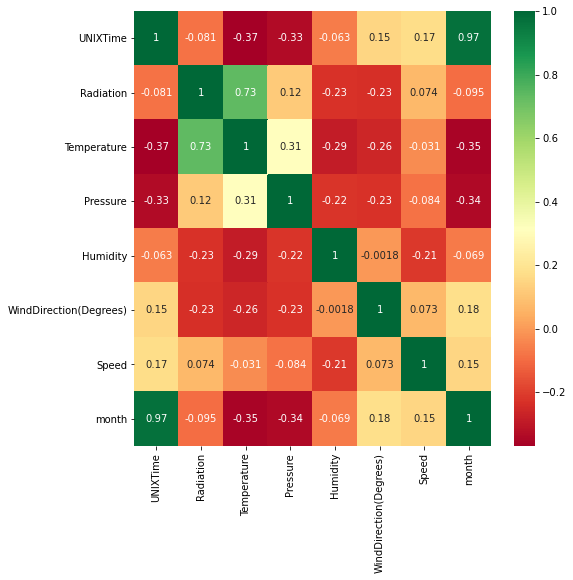

In [22]:
#get correlations of each features in dataset

corrmat = solar.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(solar[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
solar.corr()["Radiation"].sort_values(ascending = False)

Radiation                 1.000000
Temperature               0.734955
Pressure                  0.119016
Speed                     0.073627
UNIXTime                 -0.081286
month                    -0.095450
Humidity                 -0.226171
WindDirection(Degrees)   -0.230324
Name: Radiation, dtype: float64

# What are the dependencies between:

## Humidity & Solar radiation

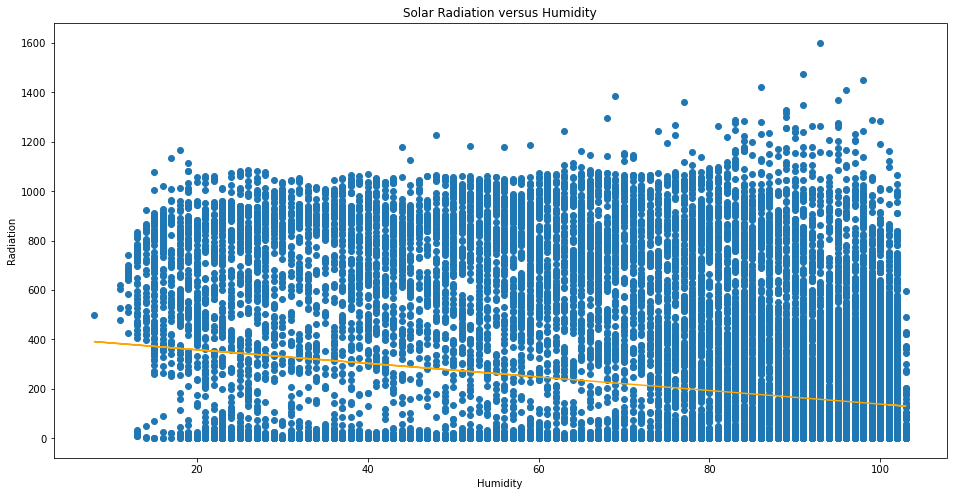

In [42]:
from sklearn.linear_model import LinearRegression
Linear_Reg = LinearRegression()
x=solar.Humidity.values.reshape(-1,1)
y=solar.Radiation.values.reshape(-1,1)

Linear_Reg.fit(x,y)

y_head=Linear_Reg.predict(x)

plt.scatter(solar.Humidity,solar.Radiation)
plt.xlabel("Humidity")
plt.ylabel("Radiation")
plt.title('Solar Radiation versus Humidity')
plt.plot(x,y_head,color="orange")

In [25]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y,y_head))

r2_score 0.051153161622292


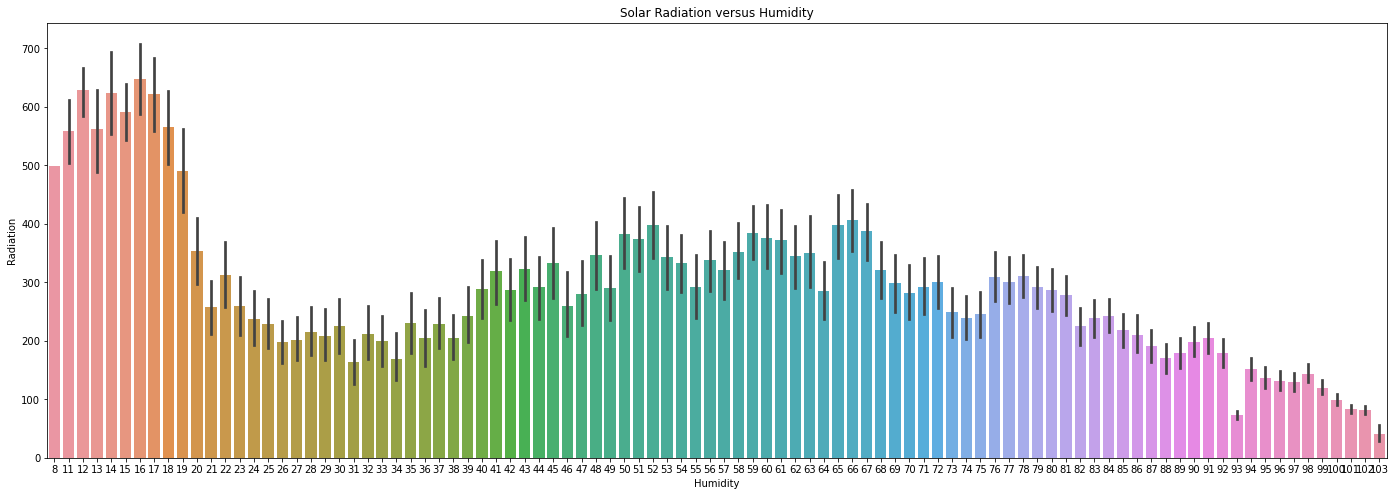

In [26]:
#Plot solar reading against temperature
plt.figure(figsize=(24,8))
sns.barplot(x=solar['Humidity'].round(decimals=0),y=solar['Radiation'])
plt.xlabel('Humidity')
plt.ylabel('Radiation')
plt.title('Solar Radiation versus Humidity')
plt.show()

## Temeperature & Solar radiation

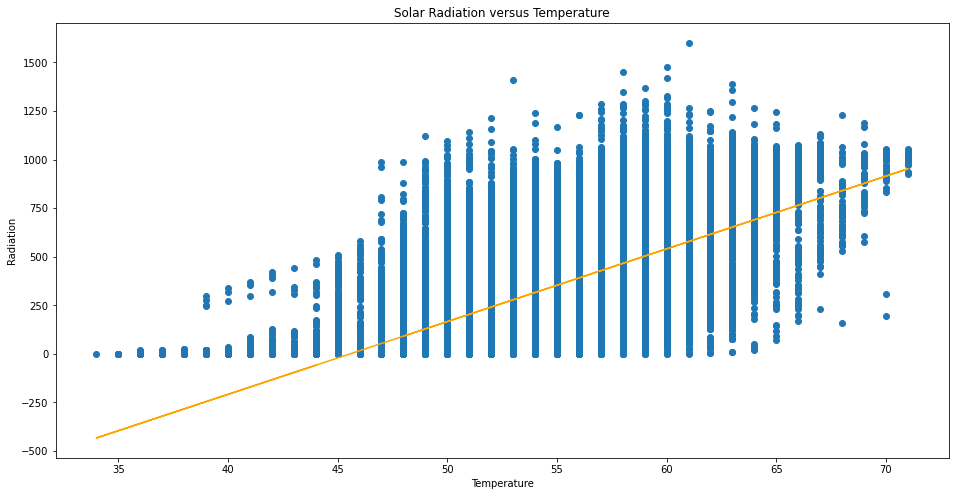

In [43]:
from sklearn.linear_model import LinearRegression
Linear_Reg = LinearRegression()
x=solar.Temperature.values.reshape(-1,1)
y=solar.Radiation.values.reshape(-1,1)

Linear_Reg.fit(x,y)

y_head=Linear_Reg.predict(x)

plt.scatter(solar.Temperature,solar.Radiation)
plt.xlabel("Temperature")
plt.ylabel("Radiation")
plt.title('Solar Radiation versus Temperature')
plt.plot(x,y_head,color="orange")

In [28]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y,y_head))

r2_score 0.5401584925375957


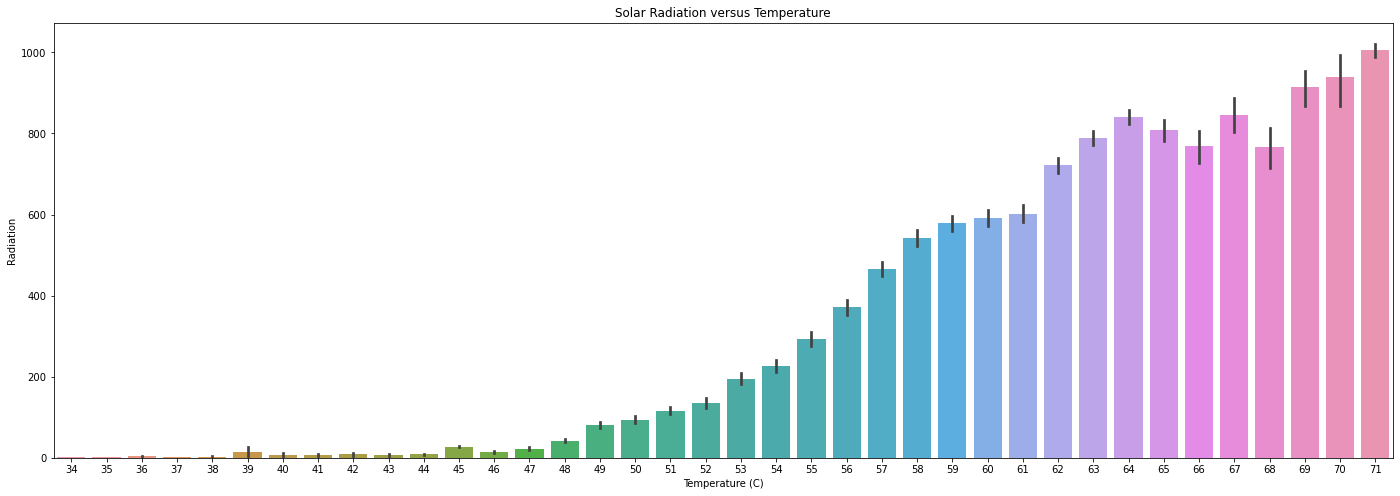

In [29]:
#Plot solar reading against temperature
plt.figure(figsize=(24,8))
sns.barplot(x=solar['Temperature'].round(decimals=0),y=solar['Radiation'])
plt.xlabel('Temperature (C)')
plt.ylabel('Radiation')
plt.title('Solar Radiation versus Temperature')
plt.show()

# month vs solar radiation

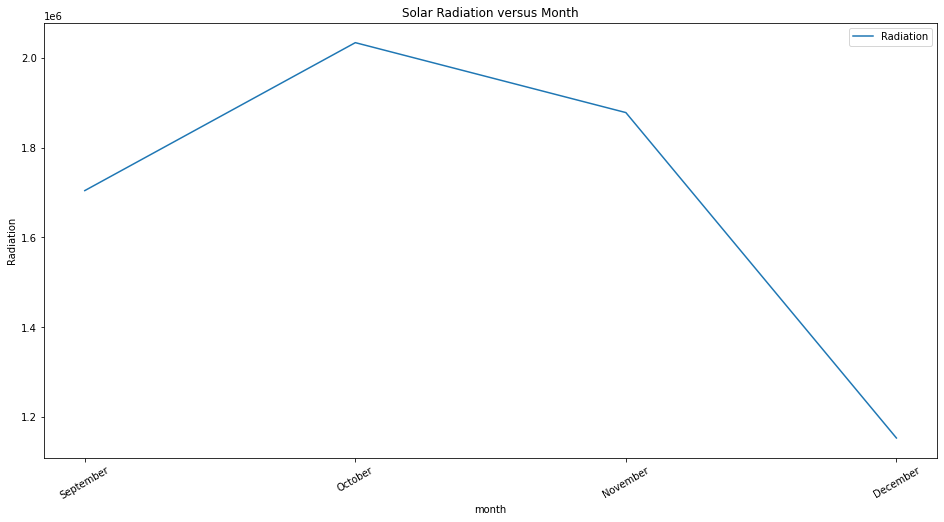

In [41]:
#Scope our dataset from September to December
plt.rcParams['figure.figsize'] = (16,8)
months = np.arange(9,13)
rad_vs_month=solar.loc[:, ['Radiation', 'month']].groupby('month').sum()
rad_vs_month.plot()

plt.xticks(months,['September', 'October', 'November', 'December'], rotation=30)
plt.ylabel('Radiation')
plt.title('Solar Radiation versus Month')
plt.show()

# Building ML Model

In [32]:
solar.drop(columns = ['sunrise_time', 'sunset_time'], inplace = True)

y = solar['Radiation']     # Dependent / Target Attribute

X = solar.drop('Radiation', axis=1) # Independetn/ Input

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state=300,shuffle=True)

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

# Model Evalutation

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
def report(model):
    y_pred = model.predict(X_test)       # Making Predictions using Test dataset
    
    MAE= mean_absolute_error(y_pred,y_test)    # Error = Actual - Predicted
    MSE=mean_squared_error(y_pred,y_test)
    RMSE=np.sqrt(MSE)
    
    print('Mean Absolute Error: '+str(MAE))
    print('Mean Sequared Error: '+str(MSE))
    print('Root Mean Squared Error: '+str(RMSE))
    
    print("Train Score:" + str(model.score(X_train, y_train)))
    print("Test Score:" + str(model.score(X_test,y_test)))

In [38]:
print('Linear Regression')
report(linear_model)

Linear Regression
Mean Absolute Error: 151.14045455087253
Root Mean Squared Error: 198.97845424348722
Train Score:0.5990414453773922
Test Score:0.6011198412021178


In [39]:
print('KNN Regressor')
report(knn_model)

KNN Regressor
Mean Absolute Error: 25.944583928207216
Root Mean Squared Error: 73.95401924601265
Train Score:0.962982634225609
Test Score:0.9448997089971837
